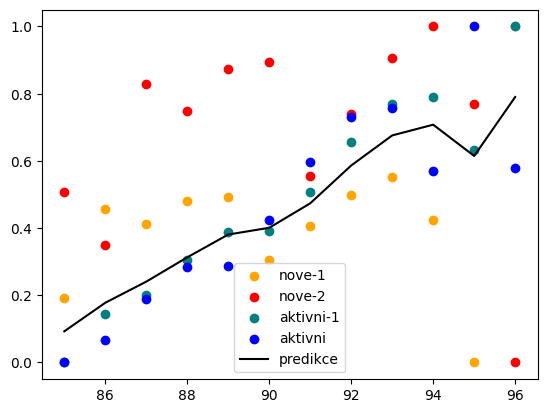

1
Mean absolute error: 600.40
Mean squared error: 488106.89
Root mean squared error: 698.65
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              951.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                    4.83e-56
Time:                        13:46:38   Log-Likelihood:                          79.311
No. Observations:                  72   AIC:                                     -152.6
Df Residuals:                      69   BIC:                                     -145.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm
test = True
out = True
graf = True


df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])

graf = True
test = True
out = True

models = []
rmse_list = []
y_pred_list = []
#* training dataframe bez randomizace
df_train =df.drop(df.index[-12:])
df_train =df.drop(df.index[-12:])
#*test dataframe bez randomizace
df_test = df.drop(df.index[:-12])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test


repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
#//zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']

#* definovat data
X = df[["aktivni-1", "nove-1", "nove-2"]]
y = df[['aktivni']]

#* training dataframe bez randomizace
X_train = X.drop(X.index[-12:])
y_train = y.drop(y.index[-12:])
#* testing dataframe bez randomizace
X_test = X.drop(X.index[:-12])
y_test = y.drop(y.index[:-12])
#*fit OLS regresi na train datech
model = sm.OLS(y_train,X_train).fit()
if test:
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_list.append(y_pred)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    
#*dotrenovat model na vsech datech
model = sm.OLS(y,X).fit()
#*pridat modely do listu pro ulozeni
models.append(model)
if graf:
    #>>graf
    #*normalizovat data pro graf
    df=(df-df.min())/(df.max()-df.min())
    df_test_graf=(df_test_graf-df_test_graf.min())/(df_test_graf.max()-df_test_graf.min())
    #* definovat data
    X = df[["aktivni-1", "nove-1", "nove-2"]]
    y = df[['aktivni']]
    #* training dataframe bez randomizace
    X_train = X.drop(X.index[-12:])
    y_train = y.drop(y.index[-12:])
    #* testing dataframe bez randomizace
    X_test = X.drop(X.index[:-12])
    y_test = y.drop(y.index[:-12])
    #*fit OLS regresi na train datech
    model = sm.OLS(y_train,X_train).fit()
    y_pred = model.predict(X_test)
    #* trenovaci data 
    plt.scatter(df_test_graf.index,df_test_graf['nove-1'],label="nove-1",color="orange")
    plt.scatter(df_test_graf.index,df_test_graf['nove-2'],label="nove-2",color="red")
    plt.scatter(df_test_graf.index,df_test_graf['aktivni-1'],label="aktivni-1",color="teal")
    #* realita
    plt.scatter(df_test_graf.index,df_test_graf['aktivni'],label="aktivni",color="blue")
    #* predikce
    plt.plot(df_test_graf.index, y_pred.values, label='predikce', color="black")
    plt.legend()
    plt.show()
if out:
    print(len(models))
    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Root mean squared error: {rmse:.2f}")
    print(model.summary())

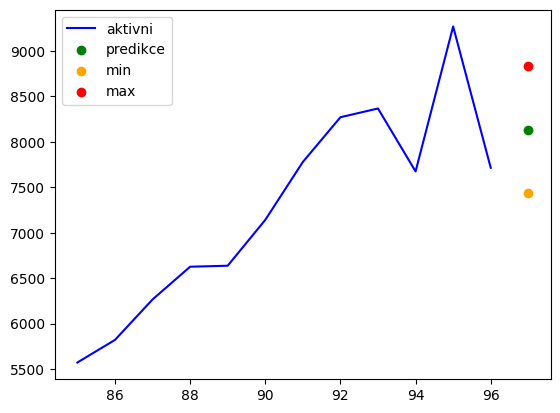


Model:      <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000021207642440>
Min:        7433
Predikce:   8132
Max:        8830
Rmse:       698



In [3]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df_orig = df.drop(df.index[-12:])

#df = (df-df.min())/(df.max()-df.min())
df_new = df.drop(df.index[:-12])
df_new = df_new.drop(df_new.index[-11:])
df_train = df.drop(df.index[-12:])



x_new = df_new[["aktivni-1", "nove-1", "nove-2"]]
#?? for i in range(1,7):
i=1

#>> nacist modely a rmse
#* nacist nejlepsi model
models = []
filename = f'OLS_model_final_copy2_short_{i}.sav'
model = pickle.load(open(filename, 'rb'))
models.append(model)
#* nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)
    
#>> predikce
predictions = []
model = models[0]
y_pred = model.predict(x_new)
#>> graf
#* realita
plt.plot(df_test.index, df_test['aktivni'],label="aktivni",color="blue")

#* predikce
plt.scatter(df_new.index, y_pred.values, label='predikce', color="green")
plt.scatter(df_new.index, y_pred.values-rmse_values[0], label='min', color="orange")
plt.scatter(df_new.index, y_pred.values+rmse_values[0], label='max', color="red")
#plt.ylim(0,10000)
plt.legend()
plt.show()
print(f"""
Model:      {model}
Min:        {int(y_pred-rmse_values[0])}
Predikce:   {int(y_pred)}
Max:        {int(y_pred+rmse_values[0])}
Rmse:       {int(rmse_values[0])}
""")